In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def loadDataSample(samplesize: int, populationsize: int):
    full = pd.read_csv('vehicles.csv', nrows=populationsize) #take 10k rows due to memory limitations
    sample = full.sample(n=samplesize)
    del(full)
    
    #Remove clearly redundant features
    sample = sample.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url'], axis=1)
    #Unnamed and id columns will have no correlation
    #Url and region url are links to pages that data was scraped from, again obviously no correlation
    #image url, could use computer vision on this but this is outside scope
    
    return sample

cars = loadDataSample(10000, 120000)

df = cars.copy()


In [4]:
#drop unwanted columns
#df = df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'image_url'],axis=1)

In [5]:
#encode
for c in df.select_dtypes(exclude='number'):
    df[c] = df[c].astype('category').cat.codes

In [6]:
numMissing = cars.isna().sum().sum()
numTotal = cars.shape[0] * cars.shape[1]
pcmissing = float(numMissing/numTotal)*100.0
print("Percent missing: ", pcmissing, "%")

Percent missing:  14.029523809523809 %


Text(0.5, 0, '% missing')

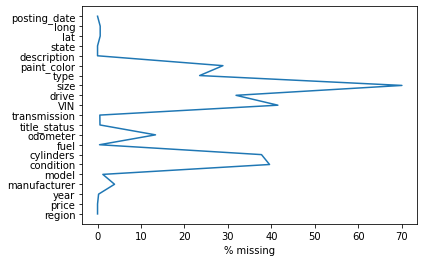

In [7]:
byFeature = pd.DataFrame(columns=cars.columns)
for feature in cars.columns:
    byFeature.at[0, feature] = float(cars[feature].isna().sum()/len(cars[feature]))*100.0

plt.plot(np.array(byFeature).reshape(-1, 1), df.columns)
plt.xlabel("% missing")